In [33]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [34]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [35]:
X_train.shape

(60000, 28, 28)

In [36]:
X_test.shape

(10000, 28, 28)

In [37]:
single_image= X_train[0]

In [38]:
single_image.shape

(28, 28)

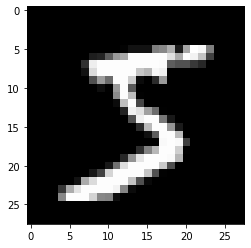

In [39]:
plt.imshow(single_image,cmap='gray')

In [40]:
y_train.shape

(60000,)

In [41]:
X_train.min()

0

In [42]:
X_train.max()

255

In [43]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [44]:
X_train_scaled.min()

0.0

In [45]:
X_train_scaled.max()

1.0

In [46]:
y_train[0]

5

In [47]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [48]:
type(y_train_onehot)

numpy.ndarray

In [49]:
y_train_onehot.shape

(60000, 10)

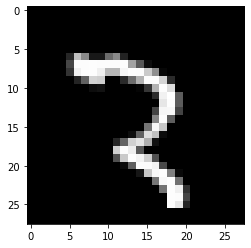

In [50]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [51]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [52]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [53]:
model = keras.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=3,activation="relu",padding="same"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [54]:
model.compile(loss="categorical_crossentropy", metrics='accuracy',optimizer="adam")

In [55]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64, 
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 33s 35ms/step - loss: 0.2619 - accuracy: 0.9205 - val_loss: 0.0719 - val_accuracy: 0.9780
Epoch 2/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0709 - accuracy: 0.9785 - val_loss: 0.0559 - val_accuracy: 0.9815
Epoch 3/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0491 - accuracy: 0.9848 - val_loss: 0.0372 - val_accuracy: 0.9875
Epoch 4/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0396 - accuracy: 0.9876 - val_loss: 0.0465 - val_accuracy: 0.9840
Epoch 5/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0333 - accuracy: 0.9894 - val_loss: 0.0357 - val_accuracy: 0.9887


In [56]:
metrics = pd.DataFrame(model.history.history)

In [57]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.261879,0.920533,0.071892,0.9780
1,0.070888,0.978450,0.055863,0.9815
2,0.049147,0.984767,0.037209,0.9875
3,0.039644,0.987567,0.046463,0.9840
4,0.033338,0.989383,0.035744,0.9887


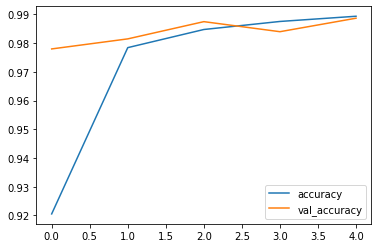

In [58]:
metrics[['accuracy','val_accuracy']].plot()

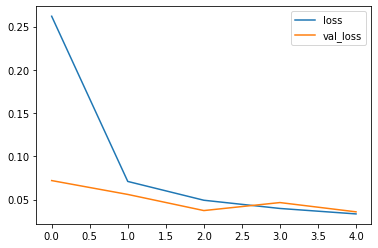

In [59]:
metrics[['loss','val_loss']].plot()

In [60]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

In [61]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 976    0    0    0    0    0    2    1    1    0]
 [   0 1126    0    2    1    2    1    2    1    0]
 [   2    2 1023    0    2    0    0    3    0    0]
 [   2    0    0  996    0    7    0    1    2    2]
 [   0    0    0    0  980    0    2    0    0    0]
 [   1    0    1    4    0  880    4    0    0    2]
 [   9    3    1    1    2    2  939    0    1    0]
 [   0    1    2    1    2    0    0 1019    1    2]
 [   6    0    1    0    2    1    0    2  959    3]
 [   2    1    1    0   13    1    0    1    1  989]]


In [62]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [74]:
img = image.load_img('imagethree.jpg')

In [75]:
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

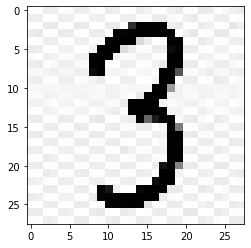

In [76]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [79]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

In [81]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0
x_single_prediction = np.argmax(model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),axis=1)
print(x_single_prediction)     

[3]
